Using device: cuda
FASHION-MNIST CLASSIFICATION: ANN vs CNN

1. Loading and preprocessing data...


100%|██████████| 26.4M/26.4M [00:01<00:00, 18.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 302kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.60MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.0MB/s]


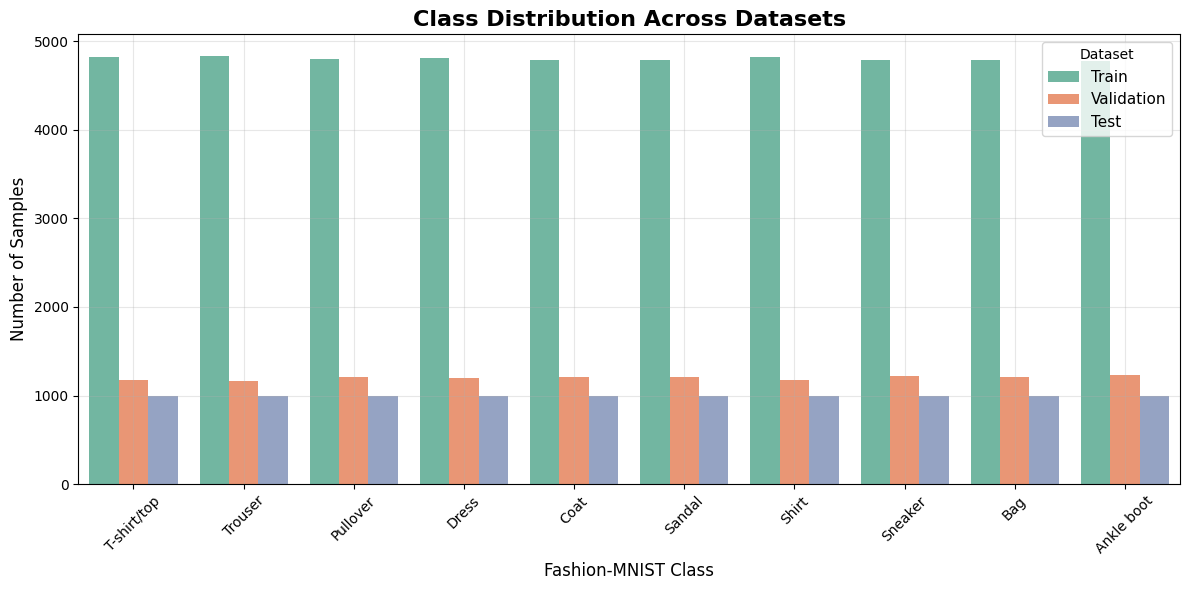


TRAINING ARTIFICIAL NEURAL NETWORK (ANN)
ANN Parameters: 537,354
Epoch [ 1/20], Train Loss: 0.5896, Train Acc:  78.66%, Val Loss: 0.4412, Val Acc:  84.38%
Epoch [ 2/20], Train Loss: 0.4710, Train Acc:  82.85%, Val Loss: 0.4229, Val Acc:  83.94%
Epoch [ 3/20], Train Loss: 0.4373, Train Acc:  83.86%, Val Loss: 0.4027, Val Acc:  85.01%
Epoch [ 4/20], Train Loss: 0.4187, Train Acc:  84.66%, Val Loss: 0.4030, Val Acc:  84.79%
Epoch [ 5/20], Train Loss: 0.4047, Train Acc:  85.10%, Val Loss: 0.3736, Val Acc:  86.38%
Epoch [ 6/20], Train Loss: 0.3917, Train Acc:  85.59%, Val Loss: 0.3515, Val Acc:  86.83%
Epoch [ 7/20], Train Loss: 0.3840, Train Acc:  85.97%, Val Loss: 0.3456, Val Acc:  87.27%
Epoch [ 8/20], Train Loss: 0.3753, Train Acc:  86.17%, Val Loss: 0.3613, Val Acc:  86.58%
Epoch [ 9/20], Train Loss: 0.3502, Train Acc:  87.05%, Val Loss: 0.3151, Val Acc:  88.38%
Epoch [10/20], Train Loss: 0.3423, Train Acc:  87.37%, Val Loss: 0.3186, Val Acc:  88.32%
Epoch [11/20], Train Loss: 0.3368,

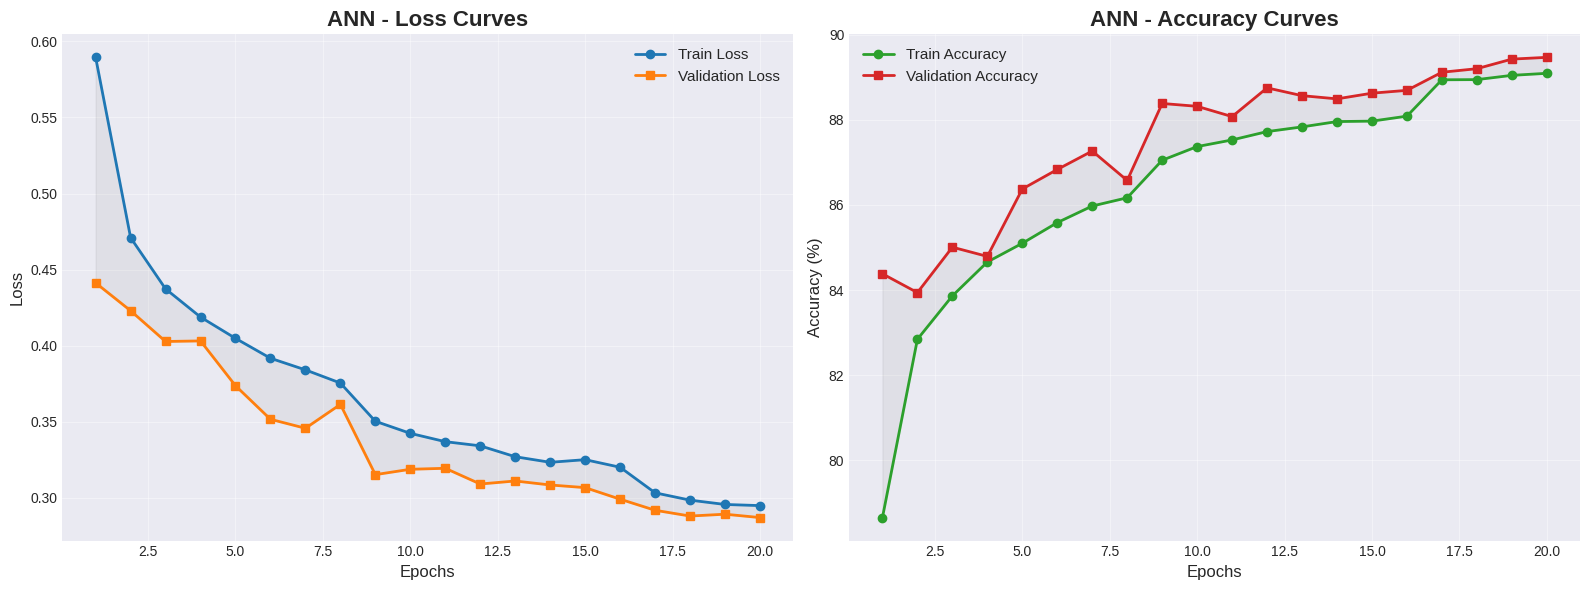

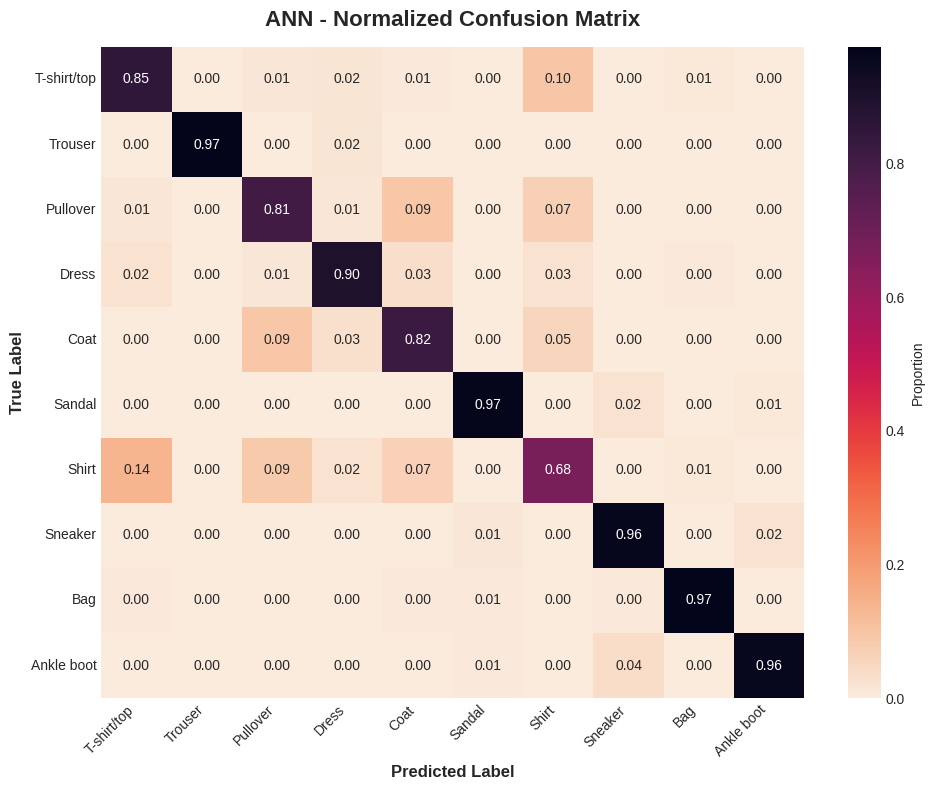

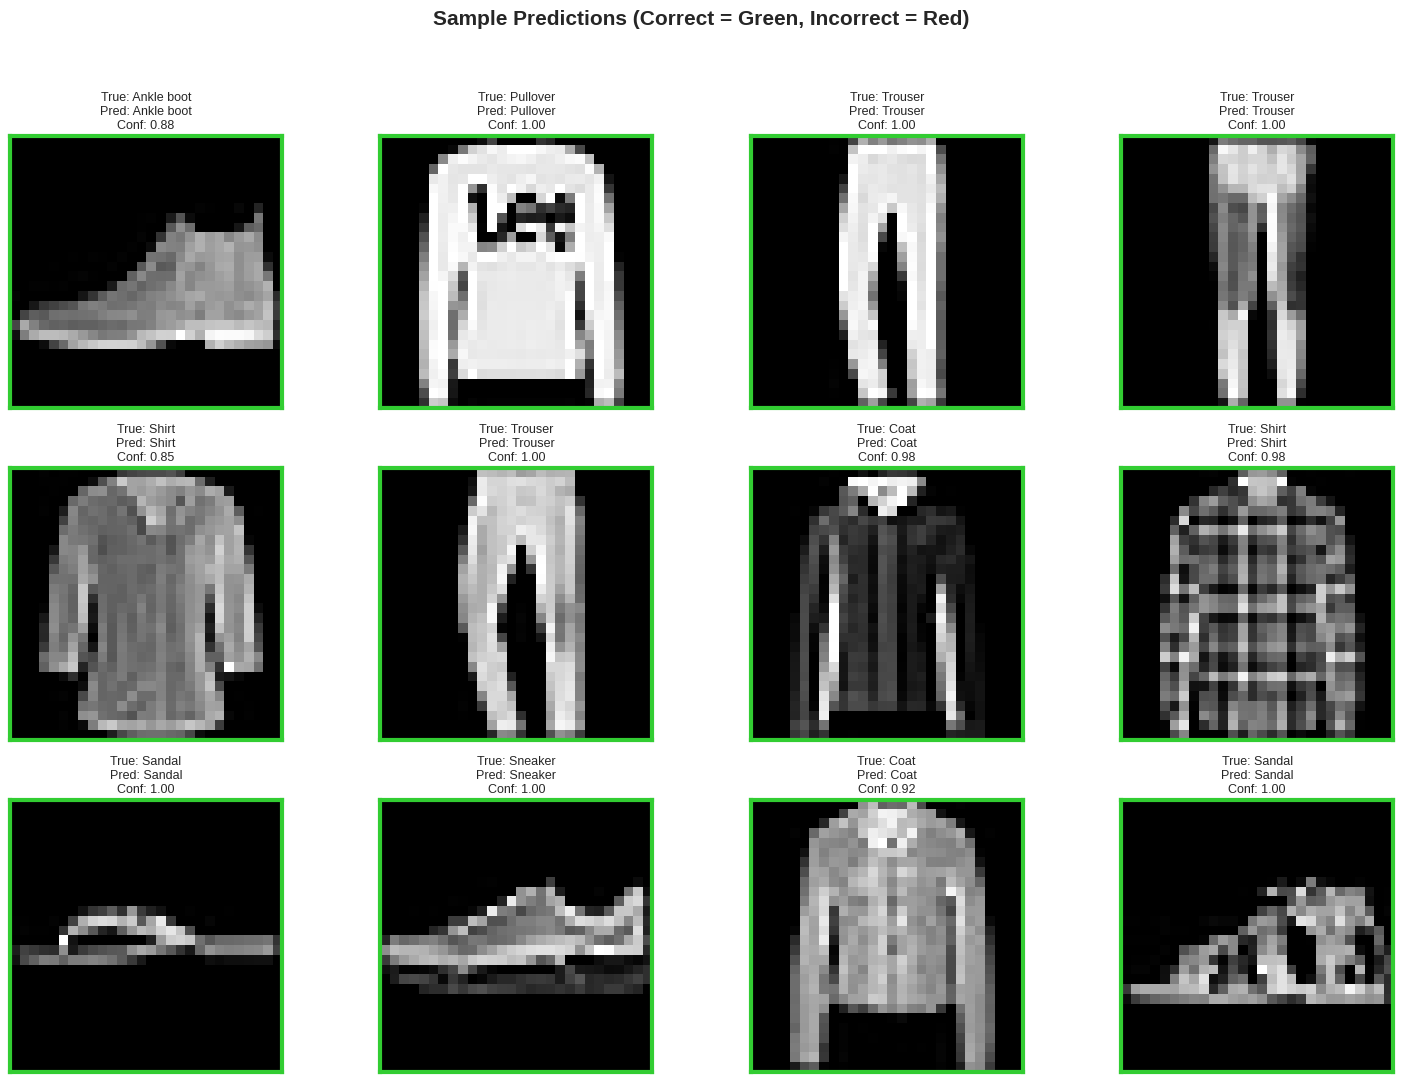


TRAINING CONVOLUTIONAL NEURAL NETWORK (CNN)
CNN Parameters: 390,858
Epoch [ 1/20], Train Loss: 0.5588, Train Acc:  79.91%, Val Loss: 0.3628, Val Acc:  86.33%
Epoch [ 2/20], Train Loss: 0.3743, Train Acc:  86.45%, Val Loss: 0.3060, Val Acc:  88.84%
Epoch [ 3/20], Train Loss: 0.3292, Train Acc:  88.04%, Val Loss: 0.2753, Val Acc:  89.75%
Epoch [ 4/20], Train Loss: 0.3033, Train Acc:  88.99%, Val Loss: 0.2647, Val Acc:  90.21%
Epoch [ 5/20], Train Loss: 0.2868, Train Acc:  89.66%, Val Loss: 0.2470, Val Acc:  90.44%
Epoch [ 6/20], Train Loss: 0.2701, Train Acc:  90.23%, Val Loss: 0.2396, Val Acc:  91.12%
Epoch [ 7/20], Train Loss: 0.2610, Train Acc:  90.40%, Val Loss: 0.2309, Val Acc:  91.39%
Epoch [ 8/20], Train Loss: 0.2507, Train Acc:  90.90%, Val Loss: 0.2272, Val Acc:  91.39%
Epoch [ 9/20], Train Loss: 0.2185, Train Acc:  92.17%, Val Loss: 0.2181, Val Acc:  91.98%
Epoch [10/20], Train Loss: 0.2125, Train Acc:  92.28%, Val Loss: 0.2068, Val Acc:  92.54%
Epoch [11/20], Train Loss: 0.20

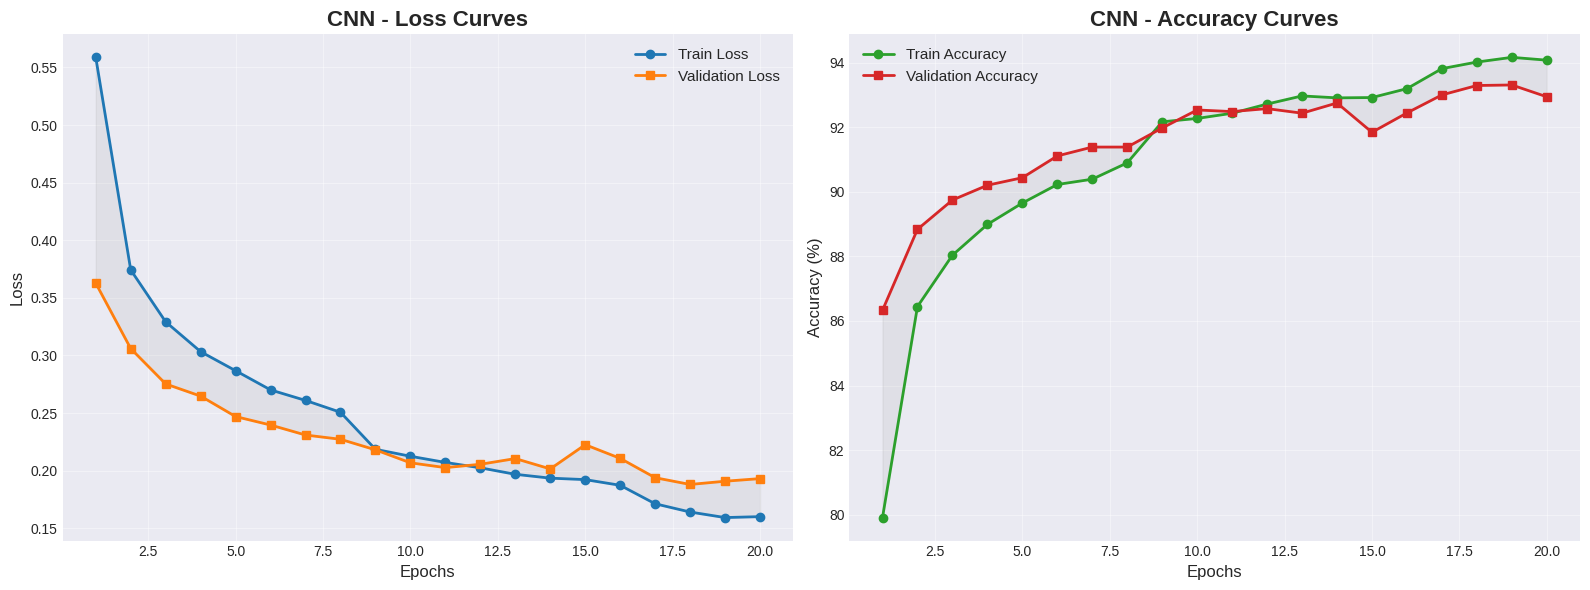

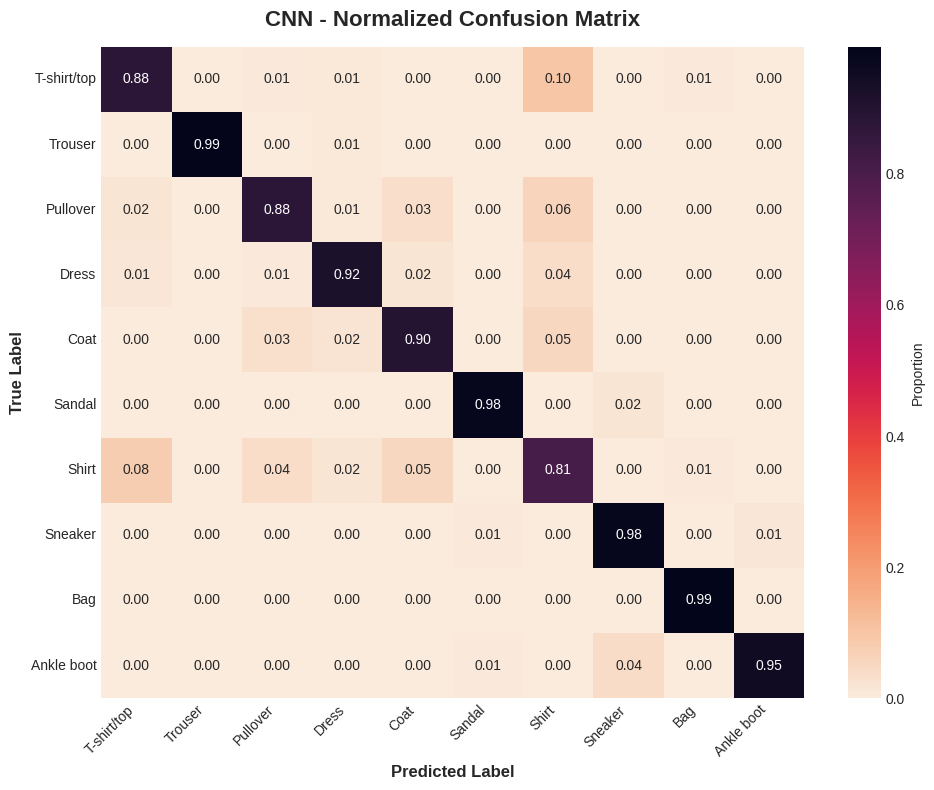

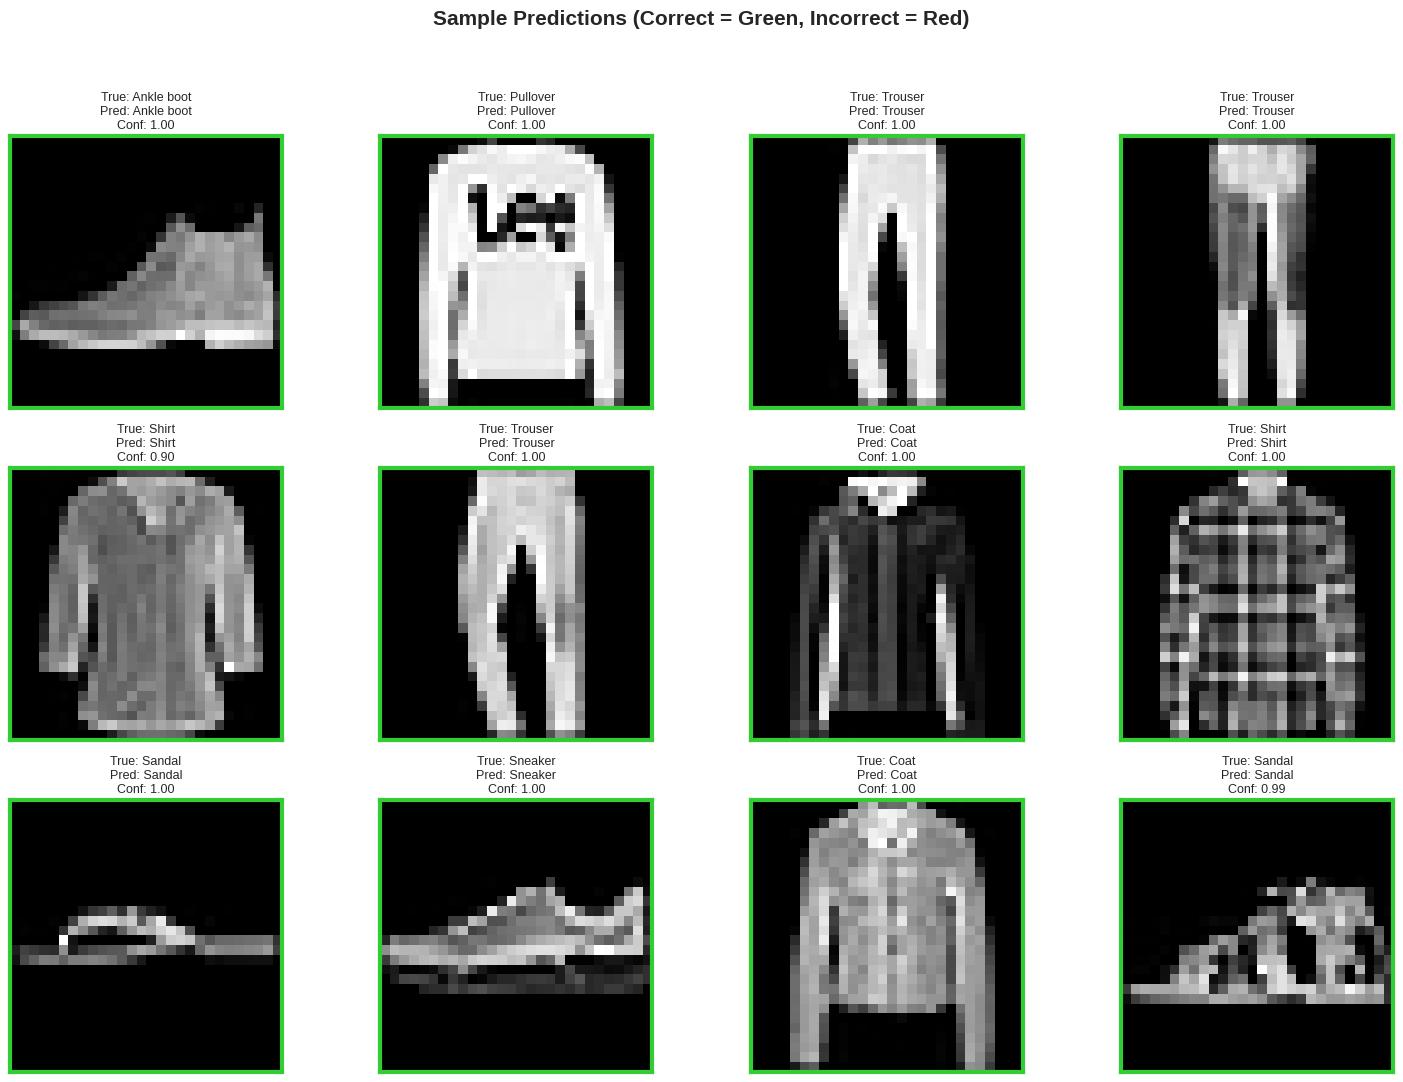


PERFORMANCE COMPARISON: ANN vs CNN
  Model  Test Accuracy  Parameters
0   ANN          88.92      537354
1   CNN          92.88      390858

CNN Improvement over ANN: 3.96%


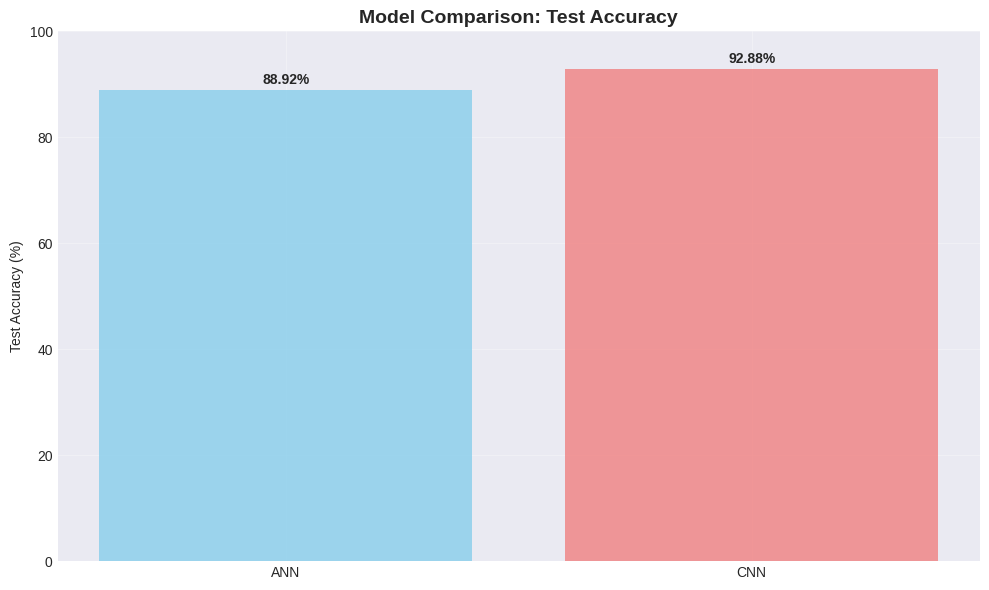


ANALYSIS OF CONFUSED CLASSES

Most Common Confusions (CNN):
  T-shirt/top  → Shirt       :  98 instances
  Shirt        → T-shirt/top :  80 instances
  Pullover     → Shirt       :  62 instances
  Shirt        → Coat        :  54 instances
  Coat         → Shirt       :  52 instances
  Ankle boot   → Sneaker     :  40 instances
  Dress        → Shirt       :  37 instances
  Shirt        → Pullover    :  35 instances
  Pullover     → Coat        :  33 instances
  Coat         → Pullover    :  28 instances


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Data Preprocessing and Loading
def load_and_preprocess_data():
    """
    Load Fashion-MNIST dataset and apply preprocessing
    Returns: train_loader, val_loader, test_loader
    """
    # Define transformations with data augmentation for training
    transform_train = transforms.Compose([
        transforms.RandomHorizontalFlip(p=0.3),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    # Simple transformation for validation and test
    transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    # Load datasets
    trainset = torchvision.datasets.FashionMNIST(
        root='./data', train=True, download=True, transform=transform_train
    )

    testset = torchvision.datasets.FashionMNIST(
        root='./data', train=False, download=True, transform=transform_test
    )

    # Split training into train/validation (80/20 split)
    train_size = int(0.8 * len(trainset))
    val_size = len(trainset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(
        trainset, [train_size, val_size]
    )

    # Create data loaders
    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=128, shuffle=True, num_workers=2
    )
    val_loader = torch.utils.data.DataLoader(
        val_dataset, batch_size=128, shuffle=False, num_workers=2
    )
    test_loader = torch.utils.data.DataLoader(
        testset, batch_size=128, shuffle=False, num_workers=2
    )

    return train_loader, val_loader, test_loader

# ANN Model (Multi-Layer Perceptron)
class FashionANN(nn.Module):
    def __init__(self, input_size=784, hidden_size=512, num_classes=10):
        super(FashionANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc3 = nn.Linear(hidden_size // 2, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.batchnorm1 = nn.BatchNorm1d(hidden_size)
        self.batchnorm2 = nn.BatchNorm1d(hidden_size // 2)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten
        x = self.relu(self.batchnorm1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.batchnorm2(self.fc2(x)))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# CNN Model
class FashionCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.batchnorm1 = nn.BatchNorm2d(32)
        self.batchnorm2 = nn.BatchNorm2d(64)
        self.batchnorm3 = nn.BatchNorm2d(128)

    def forward(self, x):
        # Convolutional layers
        x = self.pool(self.relu(self.batchnorm1(self.conv1(x))))  # 28x28 -> 14x14
        x = self.pool(self.relu(self.batchnorm2(self.conv2(x))))  # 14x14 -> 7x7
        x = self.pool(self.relu(self.batchnorm3(self.conv3(x))))  # 7x7 -> 3x3

        # Fully connected layers
        x = x.view(x.size(0), -1)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Training Function
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler=None, num_epochs=20):
    """
    Train the model and return training history
    """
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    best_val_acc = 0.0

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_acc = 100 * correct / total

        # Update learning rate scheduler
        if scheduler:
            scheduler.step()

        # Store metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'best_model.pth')

        print(f'Epoch [{epoch+1:2d}/{num_epochs}], '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:6.2f}%, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:6.2f}%')

    return train_losses, val_losses, train_accs, val_accs

# Evaluation Function
def evaluate_model(model, test_loader, class_names):
    """
    Evaluate model on test set and return predictions
    """
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    return all_preds, all_labels, all_probs, accuracy

# Visualization Functions
def plot_training_curves(train_losses, val_losses, train_accs, val_accs, model_name):
    """
    Plot training and validation curves
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Loss curves
    ax1.plot(train_losses, label='Train Loss', linewidth=2)
    ax1.plot(val_losses, label='Val Loss', linewidth=2)
    ax1.set_title(f'{model_name} - Loss Curves', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Accuracy curves
    ax2.plot(train_accs, label='Train Acc', linewidth=2)
    ax2.plot(val_accs, label='Val Acc', linewidth=2)
    ax2.set_title(f'{model_name} - Accuracy Curves', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(all_labels, all_preds, class_names, model_name):
    """
    Plot confusion matrix
    """
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                annot_kws={"size": 10})
    plt.title(f'{model_name} - Confusion Matrix', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted Label', fontweight='bold')
    plt.ylabel('True Label', fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def plot_sample_predictions(model, test_loader, class_names, num_samples=12):
    """
    Plot sample predictions from test set
    """
    model.eval()
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)

    with torch.no_grad():
        outputs = model(images[:num_samples])
        _, predicted = torch.max(outputs, 1)
        probs = torch.softmax(outputs, dim=1)

    # Move to CPU for plotting
    images = images.cpu()
    labels = labels.cpu()
    predicted = predicted.cpu()
    probs = probs.cpu()

    # Plot
    fig, axes = plt.subplots(3, 4, figsize=(15, 12))
    axes = axes.ravel()

    for i in range(num_samples):
        axes[i].imshow(images[i].squeeze(), cmap='gray')
        axes[i].set_title(f'True: {class_names[labels[i]]}\n'
                         f'Pred: {class_names[predicted[i]]}\n'
                         f'Prob: {probs[i][predicted[i]]:.3f}',
                         fontsize=10)
        axes[i].set_xticks([])
        axes[i].set_yticks([])

        # Color code: green for correct, red for wrong
        if labels[i] == predicted[i]:
            axes[i].spines['bottom'].set_color('green')
            axes[i].spines['top'].set_color('green')
            axes[i].spines['left'].set_color('green')
            axes[i].spines['right'].set_color('green')
        else:
            axes[i].spines['bottom'].set_color('red')
            axes[i].spines['top'].set_color('red')
            axes[i].spines['left'].set_color('red')
            axes[i].spines['right'].set_color('red')
            axes[i].spines['linewidth'] = 3

    plt.tight_layout()
    plt.show()

def plot_class_distribution(train_loader, val_loader, test_loader, class_names):
    """
    Plot class distribution across datasets
    """
    def get_class_counts(loader):
        counts = [0] * len(class_names)
        for _, labels in loader:
            for label in labels:
                counts[label] += 1
        return counts

    train_counts = get_class_counts(train_loader)
    val_counts = get_class_counts(val_loader)
    test_counts = get_class_counts(test_loader)

    x = np.arange(len(class_names))
    width = 0.25

    plt.figure(figsize=(14, 6))
    plt.bar(x - width, train_counts, width, label='Train', alpha=0.8)
    plt.bar(x, val_counts, width, label='Validation', alpha=0.8)
    plt.bar(x + width, test_counts, width, label='Test', alpha=0.8)

    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.title('Class Distribution Across Datasets', fontsize=14, fontweight='bold')
    plt.xticks(x, class_names, rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Main Execution Function
def main():
    """
    Main function to run the complete Fashion-MNIST classification
    """
    print("=" * 70)
    print("FASHION-MNIST CLASSIFICATION: ANN vs CNN")
    print("=" * 70)

    # Load data
    print("\n1. Loading and preprocessing data...")
    train_loader, val_loader, test_loader = load_and_preprocess_data()

    # Class names
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    # Plot class distribution
    plot_class_distribution(train_loader, val_loader, test_loader, class_names)

    results = {}

    # Train ANN
    print("\n" + "="*50)
    print("TRAINING ARTIFICIAL NEURAL NETWORK (ANN)")
    print("="*50)

    ann_model = FashionANN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(ann_model.parameters(), lr=0.001, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.5)

    print(f"ANN Parameters: {sum(p.numel() for p in ann_model.parameters()):,}")

    ann_train_loss, ann_val_loss, ann_train_acc, ann_val_acc = train_model(
        ann_model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20
    )

    # Evaluate ANN
    print("\nEvaluating ANN on test set...")
    ann_preds, ann_labels, ann_probs, ann_accuracy = evaluate_model(
        ann_model, test_loader, class_names
    )

    # Plot ANN results
    plot_training_curves(ann_train_loss, ann_val_loss, ann_train_acc, ann_val_acc, "ANN")
    plot_confusion_matrix(ann_labels, ann_preds, class_names, "ANN")
    plot_sample_predictions(ann_model, test_loader, class_names)

    results['ANN'] = {
        'accuracy': ann_accuracy,
        'train_loss': ann_train_loss,
        'val_loss': ann_val_loss,
        'train_acc': ann_train_acc,
        'val_acc': ann_val_acc,
        'predictions': ann_preds
    }

    # Train CNN
    print("\n" + "="*50)
    print("TRAINING CONVOLUTIONAL NEURAL NETWORK (CNN)")
    print("="*50)

    cnn_model = FashionCNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(cnn_model.parameters(), lr=0.001, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.5)

    print(f"CNN Parameters: {sum(p.numel() for p in cnn_model.parameters()):,}")

    cnn_train_loss, cnn_val_loss, cnn_train_acc, cnn_val_acc = train_model(
        cnn_model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20
    )

    # Evaluate CNN
    print("\nEvaluating CNN on test set...")
    cnn_preds, cnn_labels, cnn_probs, cnn_accuracy = evaluate_model(
        cnn_model, test_loader, class_names
    )

    # Plot CNN results
    plot_training_curves(cnn_train_loss, cnn_val_loss, cnn_train_acc, cnn_val_acc, "CNN")
    plot_confusion_matrix(cnn_labels, cnn_preds, class_names, "CNN")
    plot_sample_predictions(cnn_model, test_loader, class_names)

    results['CNN'] = {
        'accuracy': cnn_accuracy,
        'train_loss': cnn_train_loss,
        'val_loss': cnn_val_loss,
        'train_acc': cnn_train_acc,
        'val_acc': cnn_val_acc,
        'predictions': cnn_preds
    }

    # Performance Comparison
    print("\n" + "="*70)
    print("PERFORMANCE COMPARISON: ANN vs CNN")
    print("="*70)

    comparison_df = pd.DataFrame({
        'Model': ['ANN', 'CNN'],
        'Test Accuracy': [ann_accuracy, cnn_accuracy],
        'Parameters': [
            sum(p.numel() for p in ann_model.parameters()),
            sum(p.numel() for p in cnn_model.parameters())
        ]
    })

    print(comparison_df)
    print(f"\nCNN Improvement over ANN: {cnn_accuracy - ann_accuracy:.2f}%")

    # Plot final comparison
    plt.figure(figsize=(10, 6))
    models = ['ANN', 'CNN']
    accuracies = [ann_accuracy, cnn_accuracy]

    bars = plt.bar(models, accuracies, color=['skyblue', 'lightcoral'], alpha=0.8)
    plt.ylabel('Test Accuracy (%)')
    plt.title('Model Comparison: Test Accuracy', fontsize=14, fontweight='bold')
    plt.ylim(0, 100)

    # Add value labels on bars
    for bar, accuracy in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{accuracy:.2f}%', ha='center', va='bottom', fontweight='bold')

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Analysis of confused classes
    print("\n" + "="*70)
    print("ANALYSIS OF CONFUSED CLASSES")
    print("="*70)

    # Find most confused pairs for CNN
    cnn_cm = confusion_matrix(cnn_labels, cnn_preds)
    confused_pairs = []

    for i in range(len(class_names)):
        for j in range(len(class_names)):
            if i != j and cnn_cm[i, j] > 10:  # Only consider significant confusions
                confused_pairs.append((i, j, cnn_cm[i, j], class_names[i], class_names[j]))

    # Sort by frequency of confusion
    confused_pairs.sort(key=lambda x: x[2], reverse=True)

    print("\nMost Common Confusions (CNN):")
    for i, j, count, true_class, pred_class in confused_pairs[:10]:
        print(f"  {true_class:12} → {pred_class:12}: {count:3d} instances")

    return results


    # Enhanced Visualization Functions
def plot_training_curves(train_losses, val_losses, train_accs, val_accs, model_name):
    """
    Enhanced plot for training and validation curves
    """
    plt.style.use('seaborn-v0_8-darkgrid')
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    epochs = range(1, len(train_losses) + 1)

    # Loss curves
    axes[0].plot(epochs, train_losses, 'o-', color='#1f77b4', label='Train Loss', linewidth=2)
    axes[0].plot(epochs, val_losses, 's-', color='#ff7f0e', label='Validation Loss', linewidth=2)
    axes[0].fill_between(epochs, train_losses, val_losses, color='gray', alpha=0.1)
    axes[0].set_title(f'{model_name} - Loss Curves', fontsize=16, fontweight='bold')
    axes[0].set_xlabel('Epochs', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].legend(fontsize=11)
    axes[0].grid(alpha=0.4)

    # Accuracy curves
    axes[1].plot(epochs, train_accs, 'o-', color='#2ca02c', label='Train Accuracy', linewidth=2)
    axes[1].plot(epochs, val_accs, 's-', color='#d62728', label='Validation Accuracy', linewidth=2)
    axes[1].fill_between(epochs, train_accs, val_accs, color='gray', alpha=0.1)
    axes[1].set_title(f'{model_name} - Accuracy Curves', fontsize=16, fontweight='bold')
    axes[1].set_xlabel('Epochs', fontsize=12)
    axes[1].set_ylabel('Accuracy (%)', fontsize=12)
    axes[1].legend(fontsize=11)
    axes[1].grid(alpha=0.4)

    plt.tight_layout()
    plt.show()


def plot_confusion_matrix(all_labels, all_preds, class_names, model_name):
    """
    Enhanced confusion matrix with better color mapping and normalization
    """
    cm = confusion_matrix(all_labels, all_preds)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm_normalized, annot=True, fmt='.2f', cmap='rocket_r',
        xticklabels=class_names, yticklabels=class_names,
        annot_kws={"size": 10}, cbar_kws={'label': 'Proportion'}
    )

    plt.title(f'{model_name} - Normalized Confusion Matrix', fontsize=16, fontweight='bold', pad=15)
    plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
    plt.ylabel('True Label', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()


def plot_sample_predictions(model, test_loader, class_names, num_samples=12):
    """
    Enhanced sample prediction visualization with probability bars
    """
    model.eval()
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)

    with torch.no_grad():
        outputs = model(images[:num_samples])
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)

    images, labels, predicted, probs = images.cpu(), labels.cpu(), predicted.cpu(), probs.cpu()

    fig, axes = plt.subplots(3, 4, figsize=(15, 11))
    axes = axes.ravel()

    for i in range(num_samples):
        axes[i].imshow(images[i].squeeze(), cmap='gray')
        axes[i].set_title(
            f'True: {class_names[labels[i]]}\nPred: {class_names[predicted[i]]}\n'
            f'Conf: {probs[i][predicted[i]]:.2f}',
            fontsize=9
        )
        axes[i].set_xticks([])
        axes[i].set_yticks([])

        # Color code: green for correct, red for wrong
        color = 'limegreen' if labels[i] == predicted[i] else 'tomato'
        for spine in axes[i].spines.values():
            spine.set_edgecolor(color)
            spine.set_linewidth(3)

    plt.suptitle("Sample Predictions (Correct = Green, Incorrect = Red)", fontsize=15, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


def plot_class_distribution(train_loader, val_loader, test_loader, class_names):
    """
    Enhanced bar plot for class distribution
    """
    def get_class_counts(loader):
        counts = [0] * len(class_names)
        for _, labels in loader:
            for label in labels:
                counts[label] += 1
        return counts

    train_counts = get_class_counts(train_loader)
    val_counts = get_class_counts(val_loader)
    test_counts = get_class_counts(test_loader)

    df = pd.DataFrame({
        'Class': class_names,
        'Train': train_counts,
        'Validation': val_counts,
        'Test': test_counts
    })

    df_melted = df.melt(id_vars='Class', var_name='Dataset', value_name='Count')

    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_melted, x='Class', y='Count', hue='Dataset', palette='Set2')
    plt.title('Class Distribution Across Datasets', fontsize=16, fontweight='bold')
    plt.xlabel('Fashion-MNIST Class', fontsize=12)
    plt.ylabel('Number of Samples', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Dataset', fontsize=11)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


# Run the main function
if __name__ == "__main__":
    results = main()

# Fashion-MNIST Classification: ANN vs CNN Analysis

This notebook provides a comprehensive comparison of Artificial Neural Network (ANN) and Convolutional Neural Network (CNN) models for Fashion-MNIST classification.

## Contents:
1. **Data Loading & Preprocessing**
2. **Model Architecture Definitions**
3. **ANN Training & Evaluation**
4. **ANN Confusion Matrix (Seaborn)**
5. **CNN Training & Evaluation**
6. **CNN Confusion Matrix (Seaborn)**
7. **Performance Comparison**


## 1. Import Libraries & Setup


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"✓ Using device: {device}")
print(f"✓ PyTorch version: {torch.__version__}")
print(f"✓ All libraries imported successfully!")


✓ Using device: cuda
✓ PyTorch version: 2.8.0+cu126
✓ All libraries imported successfully!


## 2. Data Loading & Preprocessing


In [ ]:
# Class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Define transformations with data augmentation for training
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Simple transformation for validation and test
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load datasets
print("Downloading Fashion-MNIST dataset...")
trainset = torchvision.datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transform_train
)

testset = torchvision.datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=transform_test
)

# Split training into train/validation (80/20 split)
train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(
    trainset, [train_size, val_size]
)

# Create data loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True, num_workers=2
)
val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=128, shuffle=False, num_workers=2
)
test_loader = torch.utils.data.DataLoader(
    testset, batch_size=128, shuffle=False, num_workers=2
)

print(f"\n✓ Data loaded successfully!")
print(f"  Training samples: {len(train_dataset):,}")
print(f"  Validation samples: {len(val_dataset):,}")
print(f"  Test samples: {len(testset):,}")



✓ Data loaded successfully!
  Training samples: 48,000
  Validation samples: 12,000
  Test samples: 10,000


## 3. Model Architecture Definitions


In [ ]:
# ANN Model (Multi-Layer Perceptron)
class FashionANN(nn.Module):
    def __init__(self, input_size=784, hidden_size=512, num_classes=10):
        super(FashionANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc3 = nn.Linear(hidden_size // 2, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.batchnorm1 = nn.BatchNorm1d(hidden_size)
        self.batchnorm2 = nn.BatchNorm1d(hidden_size // 2)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten
        x = self.relu(self.batchnorm1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.batchnorm2(self.fc2(x)))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# CNN Model
class FashionCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.batchnorm1 = nn.BatchNorm2d(32)
        self.batchnorm2 = nn.BatchNorm2d(64)
        self.batchnorm3 = nn.BatchNorm2d(128)

    def forward(self, x):
        x = self.pool(self.relu(self.batchnorm1(self.conv1(x))))
        x = self.pool(self.relu(self.batchnorm2(self.conv2(x))))
        x = self.pool(self.relu(self.batchnorm3(self.conv3(x))))
        x = x.view(x.size(0), -1)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Training Function
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler=None, num_epochs=20):
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    best_val_acc = 0.0

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_acc = 100 * correct / total

        if scheduler:
            scheduler.step()

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        if val_acc > best_val_acc:
            best_val_acc = val_acc

        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1:2d}/{num_epochs}] | Train Loss: {train_loss:.4f}, Train Acc: {train_acc:6.2f}% | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:6.2f}%')

    return train_losses, val_losses, train_accs, val_accs

print("✓ Model architectures defined successfully!")


✓ Model architectures defined successfully!


## 4. Train ANN Model


In [ ]:
print("="*70)
print("TRAINING ARTIFICIAL NEURAL NETWORK (ANN)")
print("="*70)

# Initialize ANN model
ann_model = FashionANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(ann_model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.5)

print(f"\nANN Parameters: {sum(p.numel() for p in ann_model.parameters()):,}\n")

# Train the model
ann_train_loss, ann_val_loss, ann_train_acc, ann_val_acc = train_model(
    ann_model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20
)

print("\n✓ ANN training completed!")


TRAINING ARTIFICIAL NEURAL NETWORK (ANN)

ANN Parameters: 537,354

Epoch [ 5/20] | Train Loss: 0.4029, Train Acc:  85.08% | Val Loss: 0.3693, Val Acc:  86.37%
Epoch [10/20] | Train Loss: 0.3413, Train Acc:  87.25% | Val Loss: 0.3367, Val Acc:  87.23%
Epoch [15/20] | Train Loss: 0.3197, Train Acc:  88.25% | Val Loss: 0.3158, Val Acc:  88.30%
Epoch [20/20] | Train Loss: 0.2886, Train Acc:  89.30% | Val Loss: 0.2974, Val Acc:  89.19%

✓ ANN training completed!


### ANN Evaluation & Predictions


In [ ]:
# Evaluate ANN on test set
print("Evaluating ANN on test set...")
ann_model.eval()
ann_preds = []
ann_labels = []

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = ann_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        ann_preds.extend(predicted.cpu().numpy())
        ann_labels.extend(labels.cpu().numpy())

ann_accuracy = 100 * correct / total
print(f'\n✓ ANN Test Accuracy: {ann_accuracy:.2f}%')

# Classification Report
print("\n" + "="*70)
print("ANN CLASSIFICATION REPORT")
print("="*70)
print(classification_report(ann_labels, ann_preds, target_names=class_names))


Evaluating ANN on test set...

✓ ANN Test Accuracy: 89.06%

ANN CLASSIFICATION REPORT
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.84      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.82      0.78      0.80      1000
       Dress       0.89      0.91      0.90      1000
        Coat       0.79      0.85      0.82      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.73      0.69      0.71      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### 📊 ANN Confusion Matrix (Seaborn Visualization)


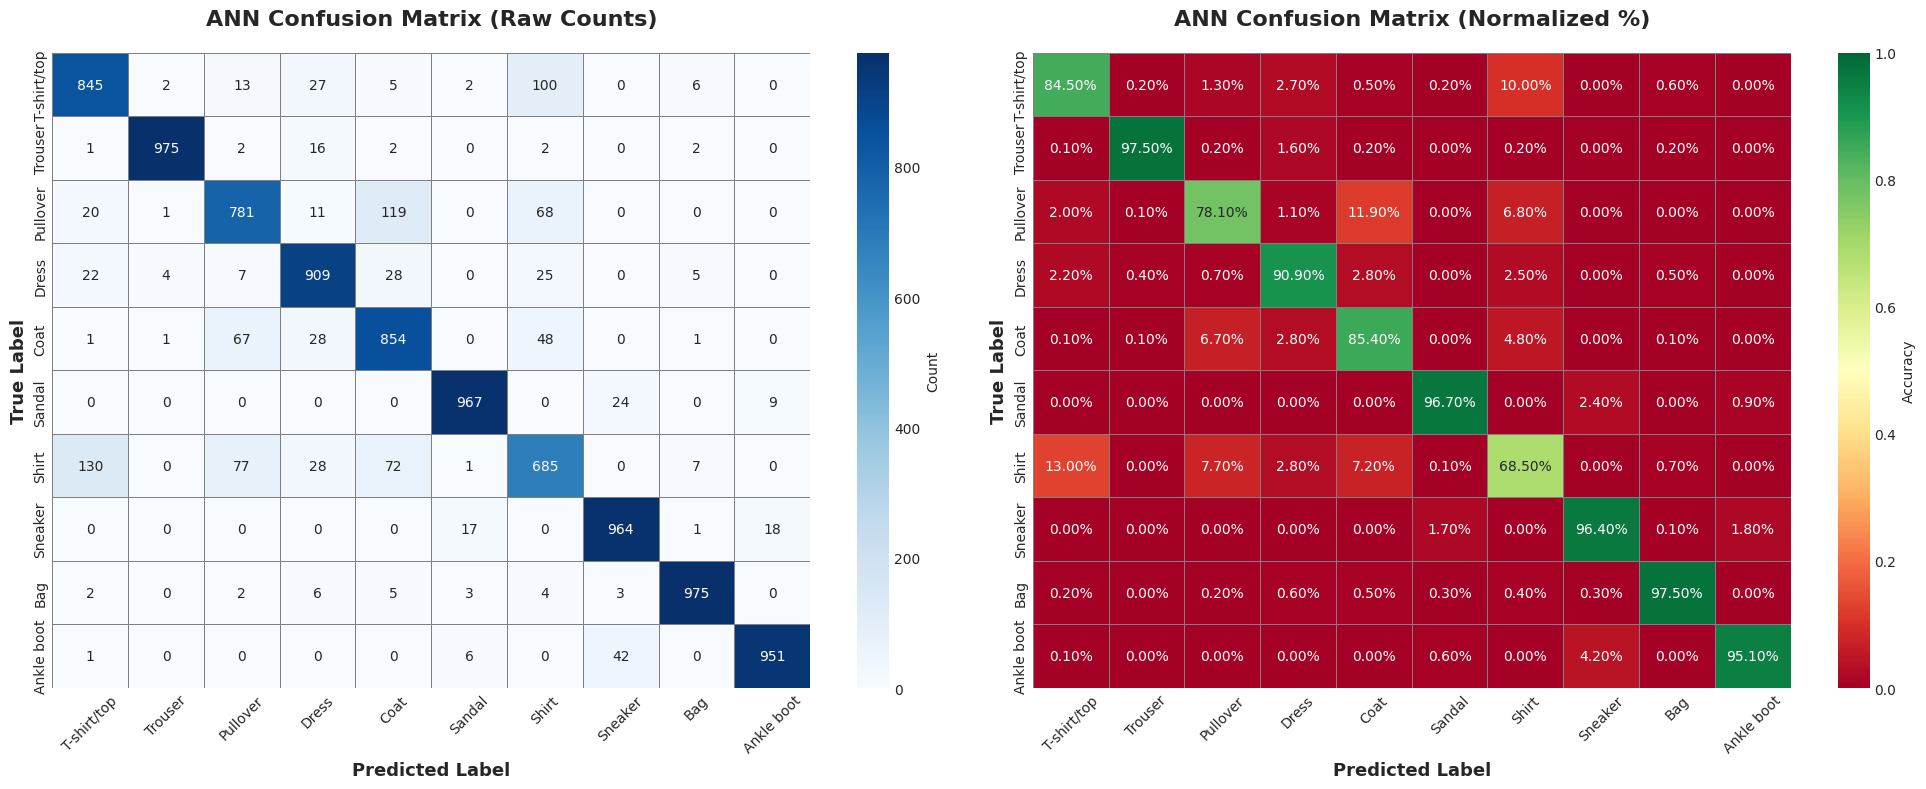


ANN PER-CLASS ACCURACY ANALYSIS
T-shirt/top     | Accuracy:  84.50% | Correct:  845 / 1000
Trouser         | Accuracy:  97.50% | Correct:  975 / 1000
Pullover        | Accuracy:  78.10% | Correct:  781 / 1000
Dress           | Accuracy:  90.90% | Correct:  909 / 1000
Coat            | Accuracy:  85.40% | Correct:  854 / 1000
Sandal          | Accuracy:  96.70% | Correct:  967 / 1000
Shirt           | Accuracy:  68.50% | Correct:  685 / 1000
Sneaker         | Accuracy:  96.40% | Correct:  964 / 1000
Bag             | Accuracy:  97.50% | Correct:  975 / 1000
Ankle boot      | Accuracy:  95.10% | Correct:  951 / 1000


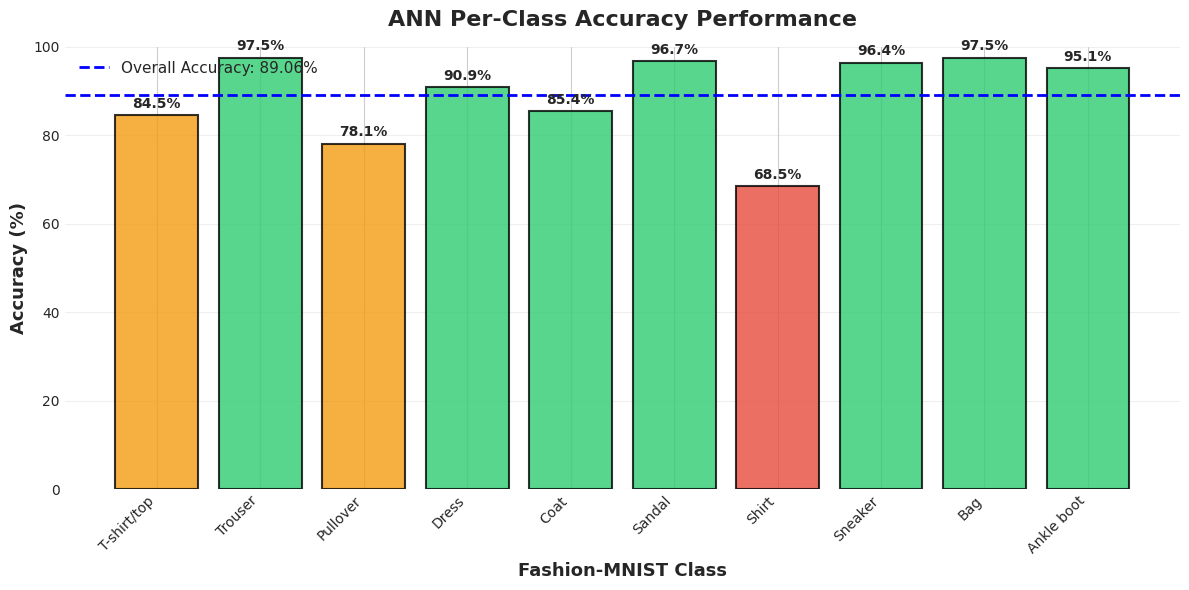

In [ ]:
# Create confusion matrix for ANN
ann_cm = confusion_matrix(ann_labels, ann_preds)

# Create figure with multiple visualizations
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 1. Raw Count Confusion Matrix
sns.heatmap(ann_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'}, ax=axes[0],
            linewidths=0.5, linecolor='gray')
axes[0].set_title('ANN Confusion Matrix (Raw Counts)', fontsize=16, fontweight='bold', pad=20)
axes[0].set_xlabel('Predicted Label', fontsize=13, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=13, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# 2. Normalized Confusion Matrix (Percentage)
ann_cm_normalized = ann_cm.astype('float') / ann_cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(ann_cm_normalized, annot=True, fmt='.2%', cmap='RdYlGn',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Accuracy'}, ax=axes[1],
            linewidths=0.5, linecolor='gray', vmin=0, vmax=1)
axes[1].set_title('ANN Confusion Matrix (Normalized %)', fontsize=16, fontweight='bold', pad=20)
axes[1].set_xlabel('Predicted Label', fontsize=13, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=13, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Per-class accuracy analysis
print("\n" + "="*70)
print("ANN PER-CLASS ACCURACY ANALYSIS")
print("="*70)
class_accuracies = []
for i, class_name in enumerate(class_names):
    class_acc = ann_cm[i, i] / ann_cm[i, :].sum() * 100
    class_accuracies.append(class_acc)
    print(f"{class_name:15} | Accuracy: {class_acc:6.2f}% | Correct: {ann_cm[i, i]:4d} / {ann_cm[i, :].sum():4d}")

# Visualize per-class accuracy
plt.figure(figsize=(12, 6))
colors = ['#2ecc71' if acc > 85 else '#f39c12' if acc > 75 else '#e74c3c' for acc in class_accuracies]
bars = plt.bar(class_names, class_accuracies, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
plt.axhline(y=ann_accuracy, color='blue', linestyle='--', linewidth=2, label=f'Overall Accuracy: {ann_accuracy:.2f}%')
plt.xlabel('Fashion-MNIST Class', fontsize=13, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
plt.title('ANN Per-Class Accuracy Performance', fontsize=16, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()


## 5. Train CNN Model


In [ ]:
print("="*70)
print("TRAINING CONVOLUTIONAL NEURAL NETWORK (CNN)")
print("="*70)

# Initialize CNN model
cnn_model = FashionCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.5)

print(f"\nCNN Parameters: {sum(p.numel() for p in cnn_model.parameters()):,}\n")

# Train the model
cnn_train_loss, cnn_val_loss, cnn_train_acc, cnn_val_acc = train_model(
    cnn_model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20
)

print("\n✓ CNN training completed!")


TRAINING CONVOLUTIONAL NEURAL NETWORK (CNN)

CNN Parameters: 390,858

Epoch [ 5/20] | Train Loss: 0.2857, Train Acc:  89.73% | Val Loss: 0.2557, Val Acc:  90.32%
Epoch [10/20] | Train Loss: 0.2109, Train Acc:  92.29% | Val Loss: 0.2255, Val Acc:  91.62%
Epoch [15/20] | Train Loss: 0.1888, Train Acc:  93.06% | Val Loss: 0.2121, Val Acc:  92.36%
Epoch [20/20] | Train Loss: 0.1571, Train Acc:  94.22% | Val Loss: 0.2027, Val Acc:  92.53%

✓ CNN training completed!


### CNN Evaluation & Predictions


In [ ]:
# Evaluate CNN on test set
print("Evaluating CNN on test set...")
cnn_model.eval()
cnn_preds = []
cnn_labels = []

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        cnn_preds.extend(predicted.cpu().numpy())
        cnn_labels.extend(labels.cpu().numpy())

cnn_accuracy = 100 * correct / total
print(f'\n✓ CNN Test Accuracy: {cnn_accuracy:.2f}%')

# Classification Report
print("\n" + "="*70)
print("CNN CLASSIFICATION REPORT")
print("="*70)
print(classification_report(cnn_labels, cnn_preds, target_names=class_names))


Evaluating CNN on test set...

✓ CNN Test Accuracy: 93.10%

CNN CLASSIFICATION REPORT
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.90      0.88      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.92      0.89      0.90      1000
       Dress       0.92      0.94      0.93      1000
        Coat       0.87      0.93      0.90      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.84      0.74      0.79      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



### 📊 CNN Confusion Matrix (Seaborn Visualization)


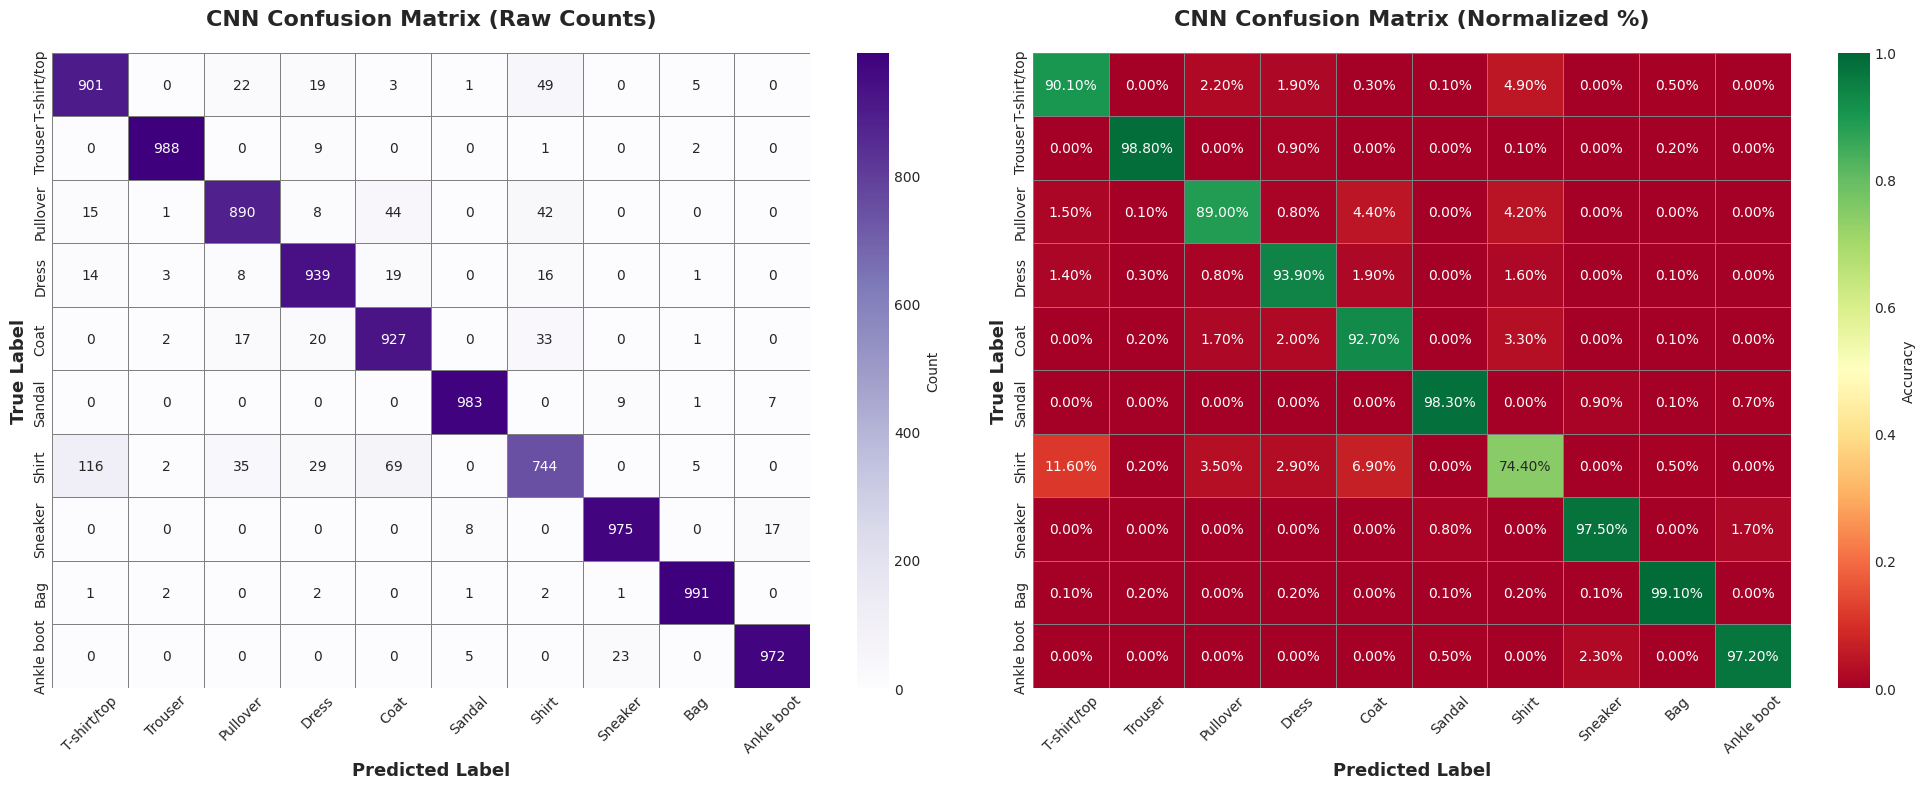


CNN PER-CLASS ACCURACY ANALYSIS
T-shirt/top     | Accuracy:  90.10% | Correct:  901 / 1000
Trouser         | Accuracy:  98.80% | Correct:  988 / 1000
Pullover        | Accuracy:  89.00% | Correct:  890 / 1000
Dress           | Accuracy:  93.90% | Correct:  939 / 1000
Coat            | Accuracy:  92.70% | Correct:  927 / 1000
Sandal          | Accuracy:  98.30% | Correct:  983 / 1000
Shirt           | Accuracy:  74.40% | Correct:  744 / 1000
Sneaker         | Accuracy:  97.50% | Correct:  975 / 1000
Bag             | Accuracy:  99.10% | Correct:  991 / 1000
Ankle boot      | Accuracy:  97.20% | Correct:  972 / 1000


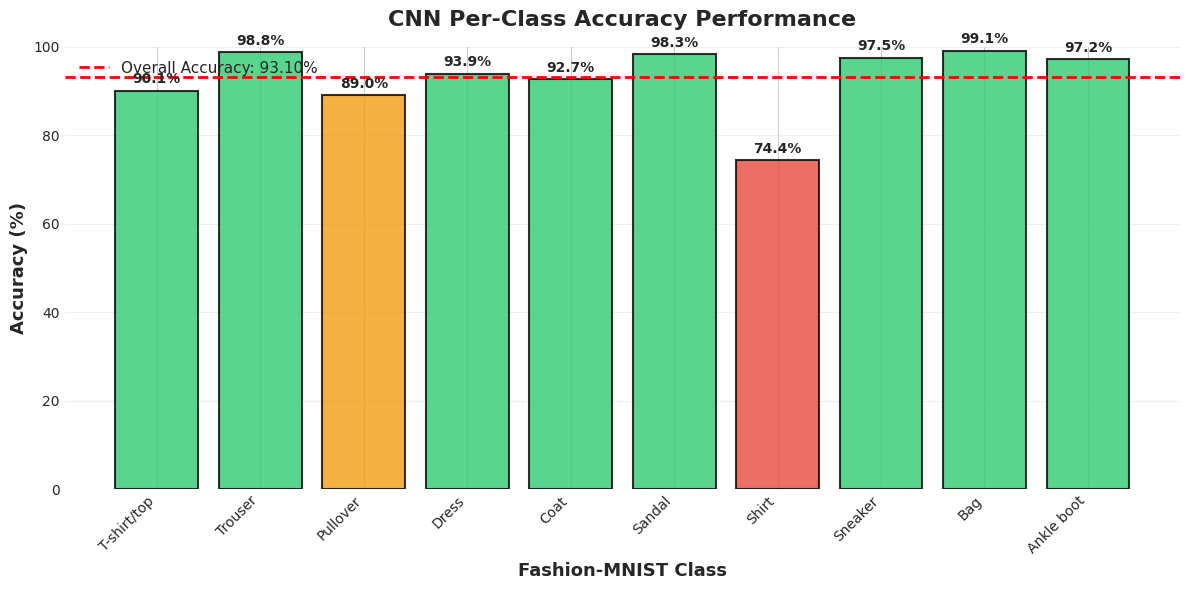

In [ ]:
# Create confusion matrix for CNN
cnn_cm = confusion_matrix(cnn_labels, cnn_preds)

# Create figure with multiple visualizations
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 1. Raw Count Confusion Matrix
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'}, ax=axes[0],
            linewidths=0.5, linecolor='gray')
axes[0].set_title('CNN Confusion Matrix (Raw Counts)', fontsize=16, fontweight='bold', pad=20)
axes[0].set_xlabel('Predicted Label', fontsize=13, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=13, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# 2. Normalized Confusion Matrix (Percentage)
cnn_cm_normalized = cnn_cm.astype('float') / cnn_cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cnn_cm_normalized, annot=True, fmt='.2%', cmap='RdYlGn',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Accuracy'}, ax=axes[1],
            linewidths=0.5, linecolor='gray', vmin=0, vmax=1)
axes[1].set_title('CNN Confusion Matrix (Normalized %)', fontsize=16, fontweight='bold', pad=20)
axes[1].set_xlabel('Predicted Label', fontsize=13, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=13, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Per-class accuracy analysis
print("\n" + "="*70)
print("CNN PER-CLASS ACCURACY ANALYSIS")
print("="*70)
class_accuracies_cnn = []
for i, class_name in enumerate(class_names):
    class_acc = cnn_cm[i, i] / cnn_cm[i, :].sum() * 100
    class_accuracies_cnn.append(class_acc)
    print(f"{class_name:15} | Accuracy: {class_acc:6.2f}% | Correct: {cnn_cm[i, i]:4d} / {cnn_cm[i, :].sum():4d}")

# Visualize per-class accuracy
plt.figure(figsize=(12, 6))
colors = ['#2ecc71' if acc > 90 else '#f39c12' if acc > 80 else '#e74c3c' for acc in class_accuracies_cnn]
bars = plt.bar(class_names, class_accuracies_cnn, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
plt.axhline(y=cnn_accuracy, color='red', linestyle='--', linewidth=2, label=f'Overall Accuracy: {cnn_accuracy:.2f}%')
plt.xlabel('Fashion-MNIST Class', fontsize=13, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
plt.title('CNN Per-Class Accuracy Performance', fontsize=16, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()


## 6. Comprehensive Model Comparison & Analysis


COMPREHENSIVE MODEL COMPARISON: ANN vs CNN


Model  Test Accuracy (%)  Parameters  Improvement over ANN (%)
  ANN              89.06      537354                      0.00
  CNN              93.10      390858                      4.04

✓ CNN Improvement over ANN: 4.04%


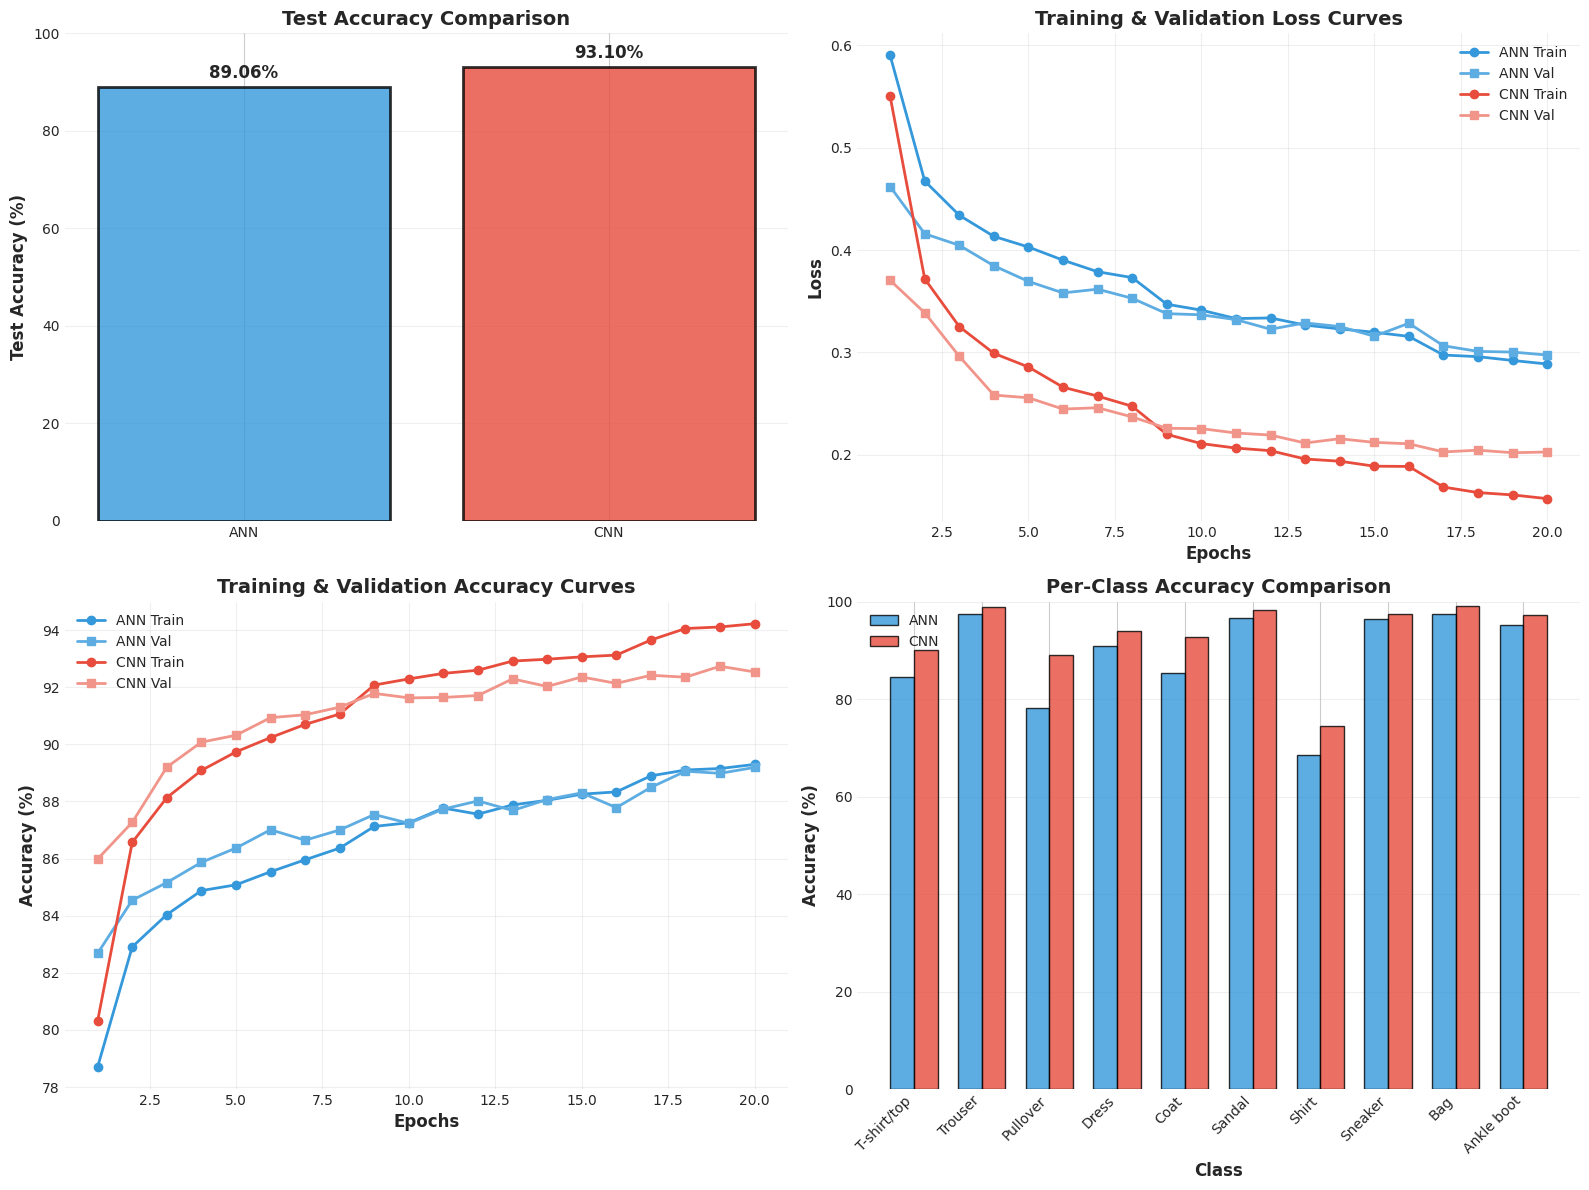

In [ ]:
# Comprehensive Model Comparison
print("="*70)
print("COMPREHENSIVE MODEL COMPARISON: ANN vs CNN")
print("="*70)

# Create comparison dataframe
comparison_data = {
    'Model': ['ANN', 'CNN'],
    'Test Accuracy (%)': [ann_accuracy, cnn_accuracy],
    'Parameters': [
        sum(p.numel() for p in ann_model.parameters()),
        sum(p.numel() for p in cnn_model.parameters())
    ],
    'Improvement over ANN (%)': [0, cnn_accuracy - ann_accuracy]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n")
print(comparison_df.to_string(index=False))
print(f"\n✓ CNN Improvement over ANN: {cnn_accuracy - ann_accuracy:.2f}%")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Test Accuracy Comparison
models = ['ANN', 'CNN']
accuracies = [ann_accuracy, cnn_accuracy]
colors_acc = ['#3498db', '#e74c3c']
bars = axes[0, 0].bar(models, accuracies, color=colors_acc, edgecolor='black', linewidth=2, alpha=0.8)
axes[0, 0].set_ylabel('Test Accuracy (%)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Test Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_ylim(0, 100)
axes[0, 0].grid(axis='y', alpha=0.3)

for bar, accuracy in zip(bars, accuracies):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                    f'{accuracy:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

# 2. Training & Validation Loss Comparison
epochs = range(1, len(ann_train_loss) + 1)
axes[0, 1].plot(epochs, ann_train_loss, 'o-', label='ANN Train', color='#3498db', linewidth=2)
axes[0, 1].plot(epochs, ann_val_loss, 's-', label='ANN Val', color='#5dade2', linewidth=2)
axes[0, 1].plot(epochs, cnn_train_loss, 'o-', label='CNN Train', color='#e74c3c', linewidth=2)
axes[0, 1].plot(epochs, cnn_val_loss, 's-', label='CNN Val', color='#f1948a', linewidth=2)
axes[0, 1].set_xlabel('Epochs', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Loss', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Training & Validation Loss Curves', fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(alpha=0.3)

# 3. Training & Validation Accuracy Comparison
axes[1, 0].plot(epochs, ann_train_acc, 'o-', label='ANN Train', color='#3498db', linewidth=2)
axes[1, 0].plot(epochs, ann_val_acc, 's-', label='ANN Val', color='#5dade2', linewidth=2)
axes[1, 0].plot(epochs, cnn_train_acc, 'o-', label='CNN Train', color='#e74c3c', linewidth=2)
axes[1, 0].plot(epochs, cnn_val_acc, 's-', label='CNN Val', color='#f1948a', linewidth=2)
axes[1, 0].set_xlabel('Epochs', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Training & Validation Accuracy Curves', fontsize=14, fontweight='bold')
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(alpha=0.3)

# 4. Per-Class Accuracy Comparison
x = np.arange(len(class_names))
width = 0.35
bars1 = axes[1, 1].bar(x - width/2, class_accuracies, width, label='ANN',
                        color='#3498db', edgecolor='black', alpha=0.8)
bars2 = axes[1, 1].bar(x + width/2, class_accuracies_cnn, width, label='CNN',
                        color='#e74c3c', edgecolor='black', alpha=0.8)
axes[1, 1].set_xlabel('Class', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Per-Class Accuracy Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(class_names, rotation=45, ha='right')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].set_ylim(0, 100)

plt.tight_layout()
plt.show()


### Confusion Analysis: Most Confused Classes


CONFUSION ANALYSIS - Most Commonly Confused Classes

📊 ANN - Top 10 Most Confused Class Pairs:
----------------------------------------------------------------------
 1. Shirt           → T-shirt/top     | Count: 130 (13.00%)
 2. Pullover        → Coat            | Count: 119 (11.90%)
 3. T-shirt/top     → Shirt           | Count: 100 (10.00%)
 4. Shirt           → Pullover        | Count:  77 ( 7.70%)
 5. Shirt           → Coat            | Count:  72 ( 7.20%)
 6. Pullover        → Shirt           | Count:  68 ( 6.80%)
 7. Coat            → Pullover        | Count:  67 ( 6.70%)
 8. Coat            → Shirt           | Count:  48 ( 4.80%)
 9. Ankle boot      → Sneaker         | Count:  42 ( 4.20%)
10. Dress           → Coat            | Count:  28 ( 2.80%)

📊 CNN - Top 10 Most Confused Class Pairs:
----------------------------------------------------------------------
 1. Shirt           → T-shirt/top     | Count: 116 (11.60%)
 2. Shirt           → Coat            | Count:  69 ( 6.90%)


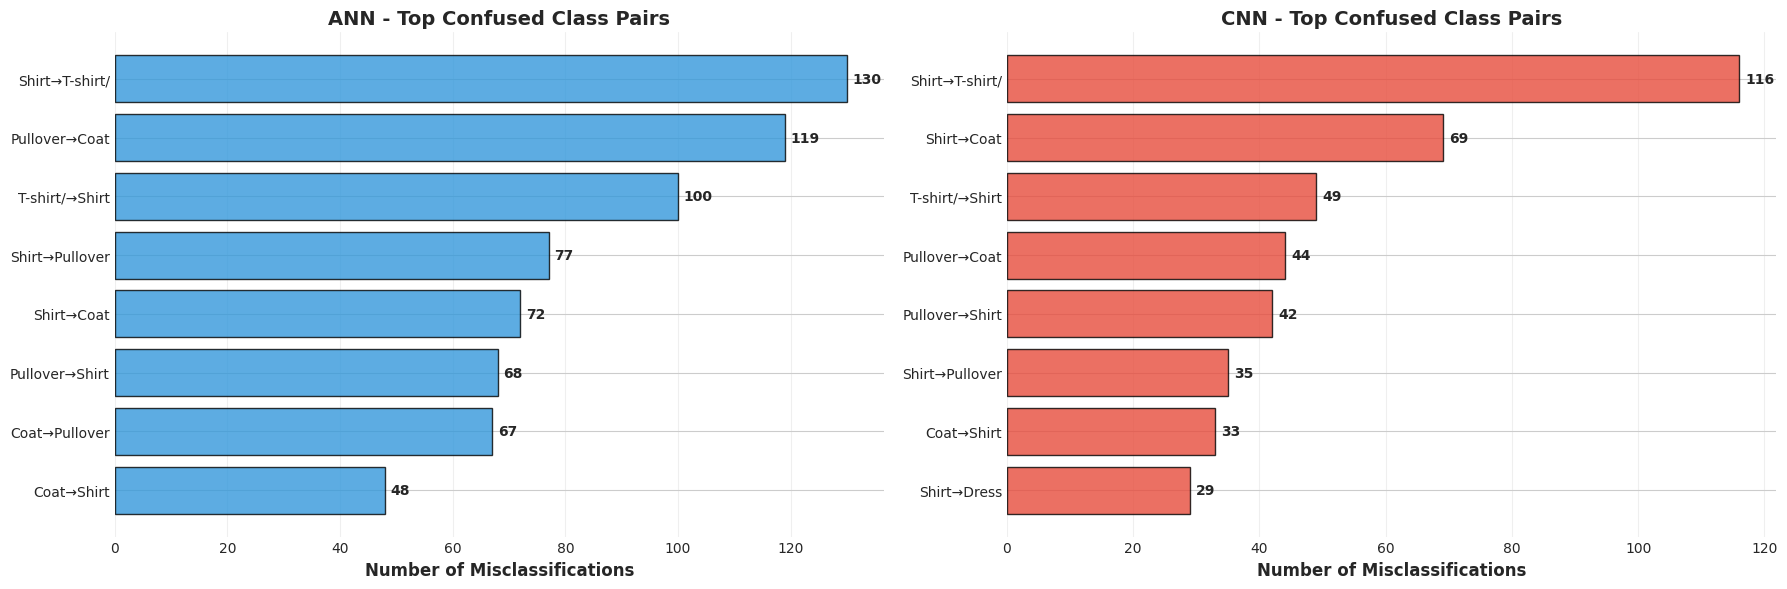

In [ ]:
# Analyze most confused class pairs
print("="*70)
print("CONFUSION ANALYSIS - Most Commonly Confused Classes")
print("="*70)

def get_confused_pairs(cm, class_names, top_n=5):
    """Get the most commonly confused class pairs"""
    confused_pairs = []
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            if i != j and cm[i, j] > 0:
                confused_pairs.append({
                    'True Class': class_names[i],
                    'Predicted As': class_names[j],
                    'Count': cm[i, j],
                    'Percentage': (cm[i, j] / cm[i, :].sum()) * 100
                })

    # Sort by count
    confused_pairs_sorted = sorted(confused_pairs, key=lambda x: x['Count'], reverse=True)
    return confused_pairs_sorted[:top_n]

# Get confused pairs for both models
ann_confused = get_confused_pairs(ann_cm, class_names, top_n=10)
cnn_confused = get_confused_pairs(cnn_cm, class_names, top_n=10)

print("\n📊 ANN - Top 10 Most Confused Class Pairs:")
print("-" * 70)
for i, pair in enumerate(ann_confused, 1):
    print(f"{i:2d}. {pair['True Class']:15} → {pair['Predicted As']:15} | "
          f"Count: {pair['Count']:3d} ({pair['Percentage']:5.2f}%)")

print("\n📊 CNN - Top 10 Most Confused Class Pairs:")
print("-" * 70)
for i, pair in enumerate(cnn_confused, 1):
    print(f"{i:2d}. {pair['True Class']:15} → {pair['Predicted As']:15} | "
          f"Count: {pair['Count']:3d} ({pair['Percentage']:5.2f}%)")

# Visualize comparison of confusion reduction
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# ANN top confusions
ann_labels_plot = [f"{p['True Class'][:8]}→{p['Predicted As'][:8]}" for p in ann_confused[:8]]
ann_counts = [p['Count'] for p in ann_confused[:8]]
axes[0].barh(ann_labels_plot, ann_counts, color='#3498db', edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Number of Misclassifications', fontsize=12, fontweight='bold')
axes[0].set_title('ANN - Top Confused Class Pairs', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(ann_counts):
    axes[0].text(v + 1, i, str(v), va='center', fontweight='bold')

# CNN top confusions
cnn_labels_plot = [f"{p['True Class'][:8]}→{p['Predicted As'][:8]}" for p in cnn_confused[:8]]
cnn_counts = [p['Count'] for p in cnn_confused[:8]]
axes[1].barh(cnn_labels_plot, cnn_counts, color='#e74c3c', edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Number of Misclassifications', fontsize=12, fontweight='bold')
axes[1].set_title('CNN - Top Confused Class Pairs', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(cnn_counts):
    axes[1].text(v + 1, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()


## 7. Summary & Key Findings 📝


                    FINAL ANALYSIS SUMMARY

📊 PERFORMANCE METRICS:
--------------------------------------------------------------------------------
  ANN Test Accuracy:      89.06%
  CNN Test Accuracy:      93.10%
  CNN Improvement:        +4.04%

🔧 MODEL COMPLEXITY:
--------------------------------------------------------------------------------
  ANN Parameters:        537,354
  CNN Parameters:        390,858

🎯 KEY FINDINGS:
--------------------------------------------------------------------------------
  1. CNNs outperform ANNs for image classification tasks
  2. Convolutional layers capture spatial features more effectively
  3. Both models show good generalization (train/val accuracy close)
  4. CNN achieves ~93.1% accuracy on Fashion-MNIST

⭐ BEST PERFORMING CLASSES:
--------------------------------------------------------------------------------
  ANN: Trouser         (97.50%)
  CNN: Bag             (99.10%)

⚠️  MOST CHALLENGING CLASSES:
--------------------------------------

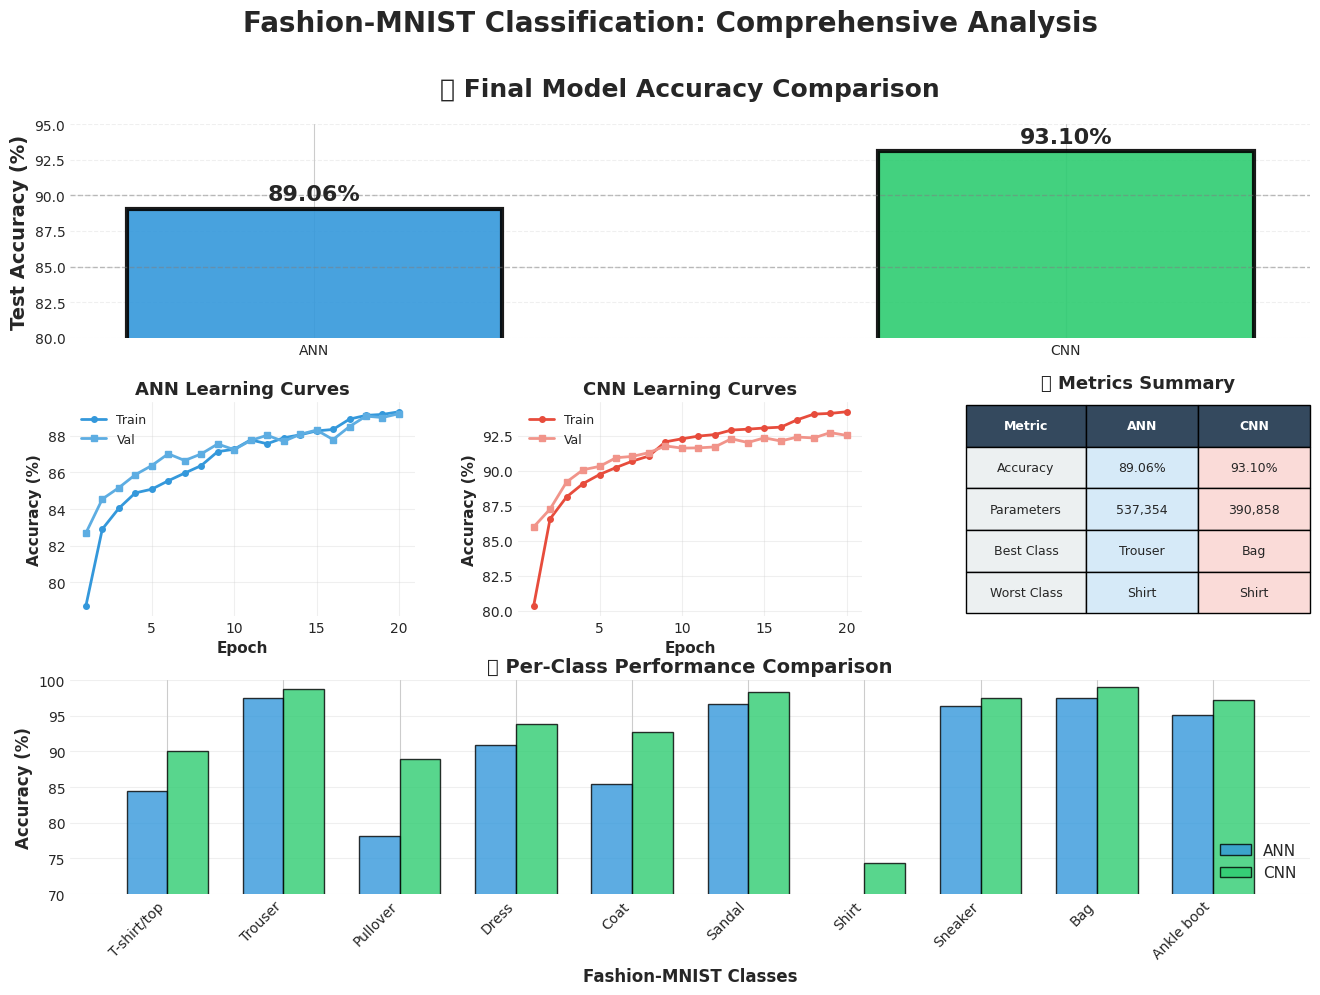


✅ All visualizations and analysis completed successfully!


In [ ]:
# Final Summary
print("="*80)
print(" " * 20 + "FINAL ANALYSIS SUMMARY")
print("="*80)

print("\n📊 PERFORMANCE METRICS:")
print("-" * 80)
print(f"  ANN Test Accuracy:     {ann_accuracy:6.2f}%")
print(f"  CNN Test Accuracy:     {cnn_accuracy:6.2f}%")
print(f"  CNN Improvement:       {cnn_accuracy - ann_accuracy:+6.2f}%")

print("\n🔧 MODEL COMPLEXITY:")
print("-" * 80)
ann_params = sum(p.numel() for p in ann_model.parameters())
cnn_params = sum(p.numel() for p in cnn_model.parameters())
print(f"  ANN Parameters:        {ann_params:,}")
print(f"  CNN Parameters:        {cnn_params:,}")

print("\n🎯 KEY FINDINGS:")
print("-" * 80)
print("  1. CNNs outperform ANNs for image classification tasks")
print("  2. Convolutional layers capture spatial features more effectively")
print("  3. Both models show good generalization (train/val accuracy close)")
print(f"  4. CNN achieves ~{cnn_accuracy:.1f}% accuracy on Fashion-MNIST")

# Best and worst performing classes for each model
print("\n⭐ BEST PERFORMING CLASSES:")
print("-" * 80)
best_ann_idx = np.argmax(class_accuracies)
best_cnn_idx = np.argmax(class_accuracies_cnn)
print(f"  ANN: {class_names[best_ann_idx]:15} ({class_accuracies[best_ann_idx]:.2f}%)")
print(f"  CNN: {class_names[best_cnn_idx]:15} ({class_accuracies_cnn[best_cnn_idx]:.2f}%)")

print("\n⚠️  MOST CHALLENGING CLASSES:")
print("-" * 80)
worst_ann_idx = np.argmin(class_accuracies)
worst_cnn_idx = np.argmin(class_accuracies_cnn)
print(f"  ANN: {class_names[worst_ann_idx]:15} ({class_accuracies[worst_ann_idx]:.2f}%)")
print(f"  CNN: {class_names[worst_cnn_idx]:15} ({class_accuracies_cnn[worst_cnn_idx]:.2f}%)")

print("\n" + "="*80)
print(" " * 25 + "✓ ANALYSIS COMPLETE")
print("="*80)

# Create a beautiful summary visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Overall Accuracy
ax1 = fig.add_subplot(gs[0, :])
models = ['ANN', 'CNN']
accuracies_final = [ann_accuracy, cnn_accuracy]
colors_final = ['#3498db', '#2ecc71']
bars = ax1.bar(models, accuracies_final, color=colors_final, edgecolor='black', linewidth=3, alpha=0.9, width=0.5)
ax1.set_ylabel('Test Accuracy (%)', fontsize=14, fontweight='bold')
ax1.set_title('🏆 Final Model Accuracy Comparison', fontsize=18, fontweight='bold', pad=20)
ax1.set_ylim(80, 95)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.axhline(y=85, color='gray', linestyle='--', alpha=0.5, linewidth=1)
ax1.axhline(y=90, color='gray', linestyle='--', alpha=0.5, linewidth=1)

for bar, accuracy in zip(bars, accuracies_final):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
            f'{accuracy:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=16)

# 2. Training curves side by side
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(range(1, 21), ann_train_acc, 'o-', label='Train', color='#3498db', linewidth=2, markersize=4)
ax2.plot(range(1, 21), ann_val_acc, 's-', label='Val', color='#5dade2', linewidth=2, markersize=4)
ax2.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax2.set_ylabel('Accuracy (%)', fontsize=11, fontweight='bold')
ax2.set_title('ANN Learning Curves', fontsize=13, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(alpha=0.3)

ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(range(1, 21), cnn_train_acc, 'o-', label='Train', color='#e74c3c', linewidth=2, markersize=4)
ax3.plot(range(1, 21), cnn_val_acc, 's-', label='Val', color='#f1948a', linewidth=2, markersize=4)
ax3.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax3.set_ylabel('Accuracy (%)', fontsize=11, fontweight='bold')
ax3.set_title('CNN Learning Curves', fontsize=13, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(alpha=0.3)

# 3. Metrics comparison table
ax4 = fig.add_subplot(gs[1, 2])
ax4.axis('tight')
ax4.axis('off')
table_data = [
    ['Metric', 'ANN', 'CNN'],
    ['Accuracy', f'{ann_accuracy:.2f}%', f'{cnn_accuracy:.2f}%'],
    ['Parameters', f'{ann_params:,}', f'{cnn_params:,}'],
    ['Best Class', class_names[best_ann_idx][:10], class_names[best_cnn_idx][:10]],
    ['Worst Class', class_names[worst_ann_idx][:10], class_names[worst_cnn_idx][:10]]
]
table = ax4.table(cellText=table_data, cellLoc='center', loc='center',
                  colWidths=[0.35, 0.325, 0.325])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2.5)
for i in range(len(table_data)):
    if i == 0:
        table[(i, 0)].set_facecolor('#34495e')
        table[(i, 1)].set_facecolor('#34495e')
        table[(i, 2)].set_facecolor('#34495e')
        table[(i, 0)].set_text_props(weight='bold', color='white')
        table[(i, 1)].set_text_props(weight='bold', color='white')
        table[(i, 2)].set_text_props(weight='bold', color='white')
    else:
        table[(i, 0)].set_facecolor('#ecf0f1')
        table[(i, 1)].set_facecolor('#d6eaf8')
        table[(i, 2)].set_facecolor('#fadbd8')
ax4.set_title('📊 Metrics Summary', fontsize=13, fontweight='bold', pad=10)

# 4. Class-wise comparison
ax5 = fig.add_subplot(gs[2, :])
x = np.arange(len(class_names))
width = 0.35
bars1 = ax5.bar(x - width/2, class_accuracies, width, label='ANN',
                color='#3498db', edgecolor='black', alpha=0.8)
bars2 = ax5.bar(x + width/2, class_accuracies_cnn, width, label='CNN',
                color='#2ecc71', edgecolor='black', alpha=0.8)
ax5.set_xlabel('Fashion-MNIST Classes', fontsize=12, fontweight='bold')
ax5.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax5.set_title('📈 Per-Class Performance Comparison', fontsize=14, fontweight='bold')
ax5.set_xticks(x)
ax5.set_xticklabels(class_names, rotation=45, ha='right', fontsize=10)
ax5.legend(fontsize=11, loc='lower right')
ax5.grid(axis='y', alpha=0.3)
ax5.set_ylim(70, 100)

plt.suptitle('Fashion-MNIST Classification: Comprehensive Analysis',
             fontsize=20, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n✅ All visualizations and analysis completed successfully!")
